In [3]:
# Import the required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('cleaned_data.csv')

In [5]:
df.dtypes

id                              float64
last_scraped                     object
host_id                           int64
host_since                       object
host_listings_count             float64
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
price                            object
number_of_reviews                 int64
number_of_reviews_l30d            int64
availability_30                   int64
availability_60                   int64
dtype: object

In [6]:
df

,id,last_scraped,host_id,host_since,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,price,number_of_reviews,number_of_reviews_l30d,availability_30,availability_60
0,7.434308e+17,2024-01-05,83422715,2016-07-12,1.0,Flatbush,Brooklyn,40.653750,-73.955020,Entire rental unit,Entire home/apt,3,$289.00,0,0,30,60
1,1.194300e+04,2024-01-05,45445,2009-10-12,1.0,Flatbush,Brooklyn,40.637020,-73.963270,Private room in home,Private room,1,$150.00,0,0,0,0
2,1.312228e+06,2024-01-05,7130382,2013-06-26,1.0,Clinton Hill,Brooklyn,40.683710,-73.964610,Private room in rental unit,Private room,1,$55.00,3,0,0,0
3,1.344048e+07,2024-01-06,17385374,2014-06-29,1.0,Upper East Side,Manhattan,40.765500,-73.970800,Private room in rental unit,Private room,1,$301.00,0,0,0,0
4,4.527754e+07,2024-01-05,51501835,2015-12-16,139.0,Hell's Kitchen,Manhattan,40.766610,-73.988100,Entire rental unit,Entire home/apt,4,$144.00,9,0,29,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389254,1.036495e+18,2023-12-04,4134337,2012-11-12,3.0,Williamsburg,Brooklyn,40.716000,-73.942120,Entire rental unit,Entire home/apt,3,$190.00,0,0,30,60
389255,1.036510e+18,2023-12-04,3030031,2012-07-23,2.0,Bushwick,Brooklyn,40.706430,-73.919442,Entire serviced apartment,Entire home/apt,2,$96.00,0,0,16,34
389256,1.036517e+18,2023-12-04,172103271,2018-02-07,4.0,Sunset Park,Brooklyn,40.646402,-73.998511,Entire rental unit,Entire home/apt,4,$156.00,0,0,20,50
389257,1.036538e+18,2023-12-04,433720268,2021-11-27,2.0,Financial District,Manhattan,40.707470,-74.005410,Entire rental unit,Entire home/apt,2,$144.00,0,0,29,59


In [7]:
# Datetime cleanup:

# Defined potential date formats
formats = [    '%Y-%m-%d', '%Y/%m/%d', '%Y%m%d',  # ISO 8601 format with different separators
    '%d-%m-%Y', '%d/%m/%Y', '%d%m%Y',  # European date format with different separators
    '%m-%d-%Y', '%m/%d/%Y', '%m%d%Y','%Y-%m-%d', '%m/%d/%y','%M/%d/%y','%d-%m-%Y', '%Y/%m/%d', '%d/%m/%Y']  

# Loop through each potential format and return a NaN if format_ isnn't found in formats
for format_ in formats:
    df['last_scraped'] = pd.to_datetime(df['last_scraped'], format=format_, errors='coerce')
    df['host_since'] = pd.to_datetime(df['host_since'], format=format_, errors='coerce')

# Deleted dates whose format could not be identified.

df=df.dropna()

In [8]:
# Clean up pricing column by removing obj. characters that can't be converted into a number and concevert to floating number

# Convert obj to float for future analysis.  Because the obj has $ and ".", we need to remove them via the str.replace.
# The regex=True allows us to cobine the removal of both '$' and the ','.  If regex=False, we'd need to run a string for '$' and another for ','
# We then use the .astype to convert to float

df['price'] = df['price'].str.replace('[\$,]', '', regex=True).astype(float)


C:\Users\phessou\AppData\Local\Temp\ipykernel_17120\2585978623.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.replace('[\$,]', '', regex=True).astype(float)


In [9]:
print(df.isnull().sum())

id                              0
last_scraped                    0
host_id                         0
host_since                      0
host_listings_count             0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
price                           0
number_of_reviews               0
number_of_reviews_l30d          0
availability_30                 0
availability_60                 0
dtype: int64


In [10]:
# Confirmed data types have been correctly formatted.

df.dtypes

id                                     float64
last_scraped                    datetime64[ns]
host_id                                  int64
host_since                      datetime64[ns]
host_listings_count                    float64
neighbourhood_cleansed                  object
neighbourhood_group_cleansed            object
latitude                               float64
longitude                              float64
property_type                           object
room_type                               object
accommodates                             int64
price                                  float64
number_of_reviews                        int64
number_of_reviews_l30d                   int64
availability_30                          int64
availability_60                          int64
dtype: object

In [11]:
df.shape

(345698, 17)

In [12]:
df.head()

,id,last_scraped,host_id,host_since,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,price,number_of_reviews,number_of_reviews_l30d,availability_30,availability_60
0,7.434308e+17,2024-01-05,83422715,2016-07-12,1.0,Flatbush,Brooklyn,40.65375,-73.95502,Entire rental unit,Entire home/apt,3,289.0,0,0,30,60
1,1.194300e+04,2024-01-05,45445,2009-10-12,1.0,Flatbush,Brooklyn,40.63702,-73.96327,Private room in home,Private room,1,150.0,0,0,0,0
2,1.312228e+06,2024-01-05,7130382,2013-06-26,1.0,Clinton Hill,Brooklyn,40.68371,-73.96461,Private room in rental unit,Private room,1,55.0,3,0,0,0
3,1.344048e+07,2024-01-06,17385374,2014-06-29,1.0,Upper East Side,Manhattan,40.76550,-73.97080,Private room in rental unit,Private room,1,301.0,0,0,0,0
4,4.527754e+07,2024-01-05,51501835,2015-12-16,139.0,Hell's Kitchen,Manhattan,40.76661,-73.98810,Entire rental unit,Entire home/apt,4,144.0,9,0,29,59


In [13]:
df1=df.loc[df['availability_60']>0].reset_index(drop=True)
df1.shape

(223392, 17)

In [14]:
df1.head()

,id,last_scraped,host_id,host_since,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,price,number_of_reviews,number_of_reviews_l30d,availability_30,availability_60
0,7.434308e+17,2024-01-05,83422715,2016-07-12,1.0,Flatbush,Brooklyn,40.653750,-73.955020,Entire rental unit,Entire home/apt,3,289.0,0,0,30,60
1,4.527754e+07,2024-01-05,51501835,2015-12-16,139.0,Hell's Kitchen,Manhattan,40.766610,-73.988100,Entire rental unit,Entire home/apt,4,144.0,9,0,29,59
2,6.550782e+17,2024-01-05,22129776,2014-10-04,61.0,Midtown,Manhattan,40.751440,-73.974930,Room in hotel,Private room,2,449.0,0,0,30,60
3,3.857863e+06,2024-01-06,19902271,2014-08-12,2.0,Washington Heights,Manhattan,40.835600,-73.942500,Private room in rental unit,Private room,2,120.0,156,0,28,58
4,1.010360e+18,2024-01-05,310205815,2019-11-17,4.0,East Village,Manhattan,40.724217,-73.988522,Private room in rental unit,Private room,2,100.0,0,0,30,60


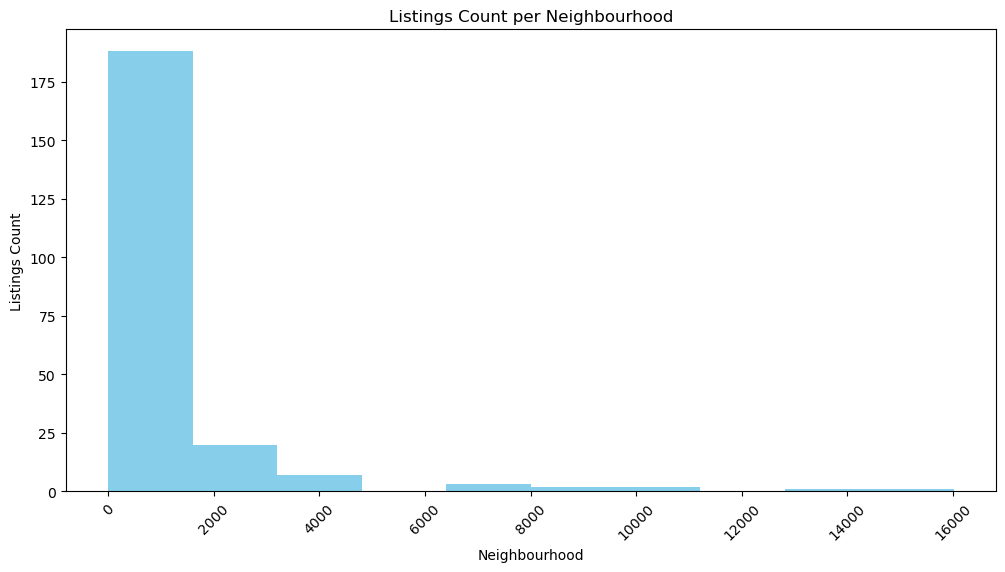

In [56]:
# This is to determine the hosts with the most listings
# Group the data by host ID, count the number of listings, and sort in descending order
top_hosts_df = df1.groupby(by='host_id').size().sort_values(ascending=False).to_frame(name='Listings Count')
top_hosts_df


#///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# Which properties are most popular based on the number of reviews?

#///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////




# Determine which neighborhood has the most listing
Most_listing_neighborhood =df1.groupby(['property_type', 'price', 'number_of_reviews', "host_id"])["host_listings_count"].sum()
Most_listing_neighborhood
#Total_Products_Sold
Most_listing_neighborhood_sorted = Most_listing_neighborhood.sort_values(ascending=False)
# Show the top 5 results.
Most_listing_neighborhood_sorted.head()    

# What is the average price of listings per neighbourhood or neighbourhood group?
average_price_per_neighbourhood = df1.groupby('neighbourhood_cleansed')['price'].mean()
average_price_per_neighbourhood
average_price_per_neighbourhood_group = df1.groupby('neighbourhood_group_cleansed')['price'].mean()
average_price_per_neighbourhood_group

# ?????????????????????????????????????????????????????????????????
# Which properties are most popular based on the number of reviews?
#??????????????????????????????????????????????????????????????????

# What types of properties are most common in different areas?
#property_counts_neighbourhood = df1.groupby(['neighbourhood_cleansed', 'property_type']).size().reset_index(name='count')
#most_common_properties_neighbourhood = property_counts_neighbourhood.loc[property_counts_neighbourhood.groupby('neighbourhood_cleansed')['count'].idxmax()]
#most_common_properties_neighbourhood
property_counts_neighbourhood_group = df1.groupby(['neighbourhood_cleansed', 'property_type']).size().reset_index(name='count')
most_common_properties_neighbourhood_group = property_counts_neighbourhood_group.loc[property_counts_neighbourhood_group.groupby('neighbourhood_cleansed')['count'].idxmax()]
most_common_properties_neighbourhood_group

# Plot the listing count per neighbourhood and per neighbourhood group
     # Listing count per neighbourhood
          # Create a bar/histogram plot to visualize the listing count per neighborhood
          # Group the data by the neighborhood column and count the number of listings in each neighborhood
neighbourhood_counts = df1['neighbourhood_cleansed'].value_counts()

# HISTOGRAM
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
neighbourhood_counts.plot(kind='hist', color='skyblue')
plt.title('Listings Count per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Listings Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


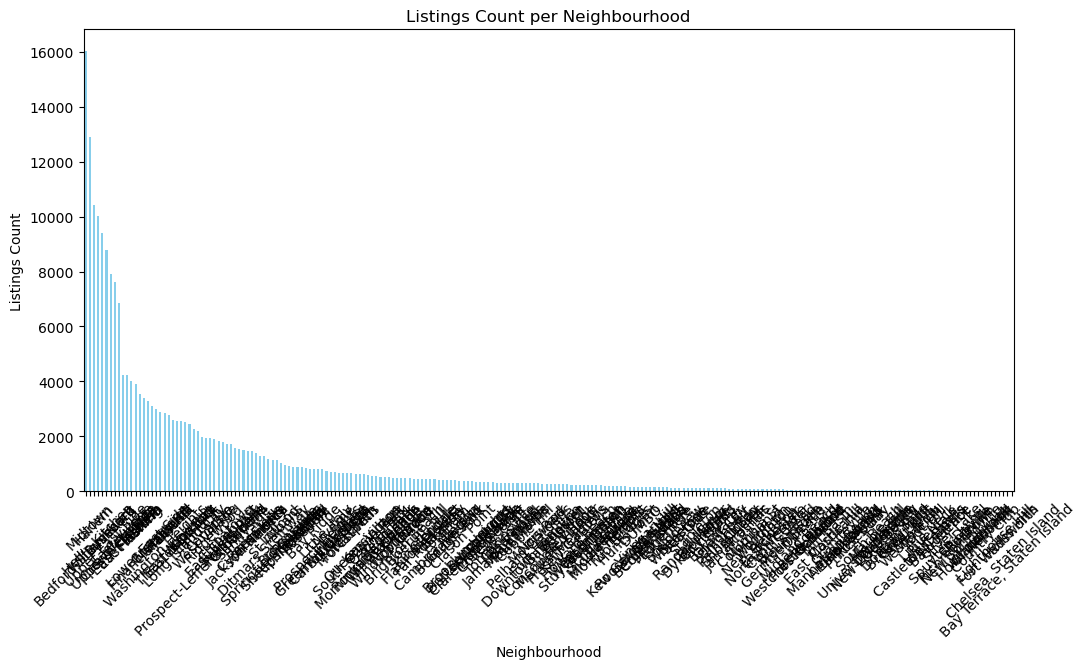

In [57]:
# BAR
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
neighbourhood_counts.plot(kind='bar', color='skyblue')
plt.title('Listings Count per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Listings Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

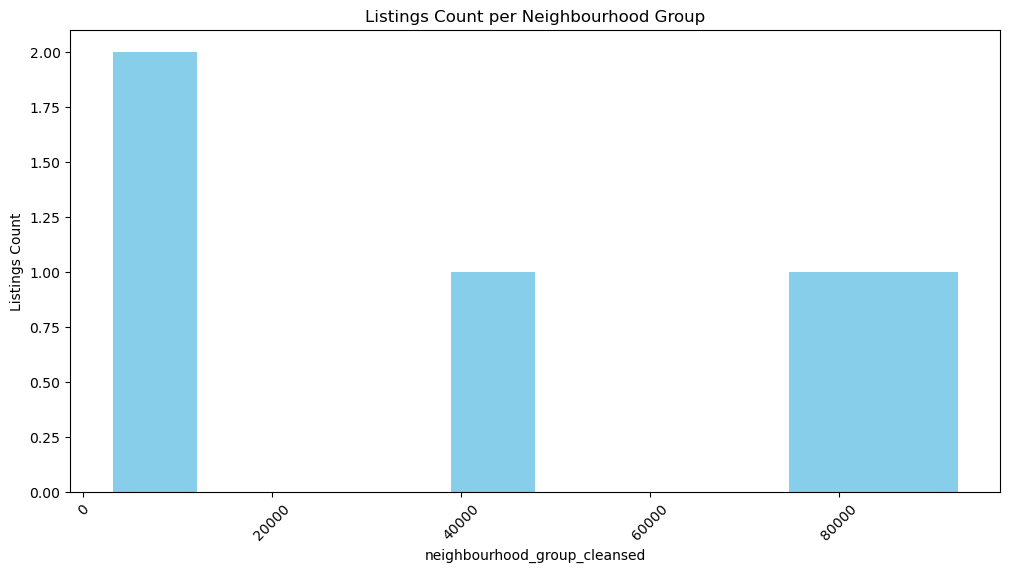

In [58]:
      # Listing count per neighbourhood group
           # Create a bar/histogram plot to visualize the listing count per neighborhood group
           # Group the data by the neighborhood group column and count the number of listings in each neighborhood group
neighbourhood_group_counts = df1['neighbourhood_group_cleansed'].value_counts()

# HISTOGRAM
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
neighbourhood_group_counts.plot(kind='hist', color='skyblue')
plt.title('Listings Count per Neighbourhood Group')
plt.xlabel('neighbourhood_group_cleansed')
plt.ylabel('Listings Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

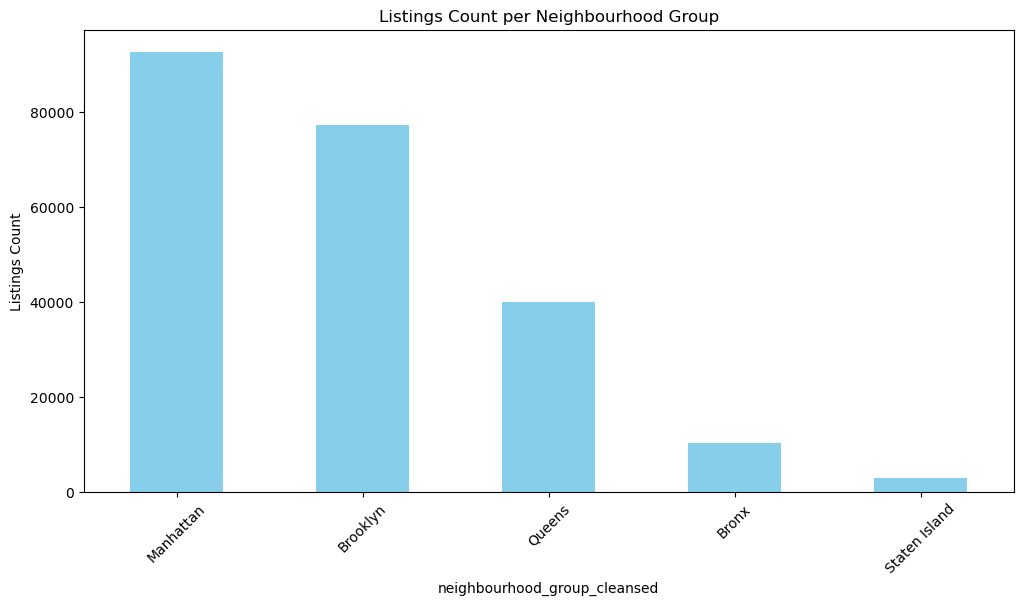

In [59]:
# BAR
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
neighbourhood_group_counts.plot(kind='bar', color='skyblue')
plt.title('Listings Count per Neighbourhood Group')
plt.xlabel('neighbourhood_group_cleansed')
plt.ylabel('Listings Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()